# 2015 StudentMoveTO Survey Data - Tabulation and Segmentation

In this notebook, we tabulate the data from the 2015 StudentMoveTO Survey. This includes paying specific attention to factors such as age, gender, and the distribution of respondents by affiliated university and campus.

After performing a literature review and discussing our findings, we have hypothesized that running the gravity model with  different groups of students may yield very different results. For instance, the model may result in a better fit for students who live away from home rather than at home. One Danish study in particular used this as a key differentiating factor in university choices. As a result, we have labelled the data into a number of segments. We explain this process below.

## Tabulation Part 1: Gender, Age, Campus 

This section of the tabulation was done with data from *SMTO_2015_Respondents.csv*.

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../Data/SMTO_2015/SMTO_2015_Respondents.csv')
df.head()

,HHKey_,PsKey_,pscmpgender,pscmpgenderkey,pscmpgendershortname,psage,pscmpagegroup,pscmpagegroupkey,psuniversity,psuniversityaffiliation,...,pspersonalincome,pspersonalincomeshortname,psparticipateprize,psagreeothersurveysflag,psagreeothersurveys,pssingleweight,psexpfactor,expansionwkdyend,expansionday,surveyshortname
0,1,5,Female,1,F,20,20 - 24 years old,5,University of Toronto,Full-Time Undergraduate,...,Unknown,unknown,NaN,NaN,Unknown,1,9.70,0.862723,0.850810,od_studentmoveto_2015_uoft
1,2,25908,Female,1,F,25,25 - 29 years old,6,University of Toronto,Full-Time Graduate,...,"$ 10,000 - 19,999",personal_income_level__10000_19999,0.0,0.0,Do not want to participate to other studies,1,5.79,1.067975,1.042488,od_studentmoveto_2015_uoft
2,3,25363,Female,1,F,23,20 - 24 years old,5,University of Toronto,Full-Time Undergraduate,...,Unknown,unknown,1.0,0.0,Do not want to participate to other studies,1,9.06,1.067975,0.980498,od_studentmoveto_2015_uoft
3,4,25948,Male,2,M,20,20 - 24 years old,5,University of Toronto,Full-Time Undergraduate,...,Unknown,unknown,1.0,1.0,Would like to participate to other studies,1,14.67,0.862723,0.874973,od_studentmoveto_2015_uoft
4,5,25329,Male,2,M,27,25 - 29 years old,6,University of Toronto,Full-Time Graduate,...,"$ 10,000 - 19,999",personal_income_level__10000_19999,1.0,1.0,Would like to participate to other studies,1,9.11,0.862723,0.874973,od_studentmoveto_2015_uoft


### Data Used (from StudentMoveTO Survey 2015)

We look at the following columns in this step of the analysis:

- __pscmpgender__: Gender
- __psage__: Person age
- __pscmpagegroup__: Respondent age in bins
- __psuniversity__: University currently attending
- __psuniversityaffiliation__: Affiliation to university
- __pscampusattend__: Campus registered at
- __pscampusmain__: Campus where the respondent spends the most time

Below we look at some distributions from the respondents' data, starting with gender:

In [3]:
df['pscmpgender'].value_counts()

Female    10203
Male       4891
Other       132
Name: pscmpgender, dtype: int64

We have a much higher number of respondents who identified as female rather than male, and 132 respondents who identified as 'Other'.

Let's now look at age distribution:

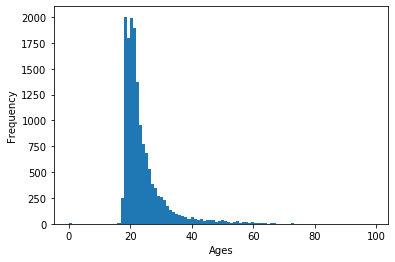

In [4]:
numBins = 100
plt.figure()
df['psage'].plot.hist(bins=numBins)
plt.xlabel('Ages')
plt.show()

We see that the majority of respondents reported ages between 19 and 25 years old. However, there are reported ages ranging from 0 to 99. Respondents who reported such ages may have been relucatant to report their actual age.

Since we also have access to the repondent's reported age group, let's see if the reported age groups accurately reflect the reported ages:

In [5]:
print("Age ranges selected:")
print(df['pscmpagegroup'].value_counts())

print("\nCounts of ranges according to identified age:")
for i in range(0, 75, 5):
    print("Between " + str(i) + " and " + str(i+4) +": " + str((df['psage'].between(i, i+4).sum())))
print("75 years old and +: " + str((df['psage'].between(75, 100).sum())))

Age ranges selected:
20 - 24 years old     6996
15 - 19 years old     4071
25 - 29 years old     2220
30 - 34 years old      906
35 - 39 years old      368
40 - 44 years old      237
45 - 49 years old      148
50 - 54 years old      118
55 - 59 years old       82
60 - 64 years old       43
65 - 69 years old       17
75 years old and +       9
70 - 74 years old        9
0 - 4 years old          2
Name: pscmpagegroup, dtype: int64

Counts of ranges according to identified age:
Between 0 and 4: 13
Between 5 and 9: 1
Between 10 and 14: 0
Between 15 and 19: 4067
Between 20 and 24: 6994
Between 25 and 29: 2219
Between 30 and 34: 906
Between 35 and 39: 368
Between 40 and 44: 235
Between 45 and 49: 147
Between 50 and 54: 119
Between 55 and 59: 82
Between 60 and 64: 41
Between 65 and 69: 18
Between 70 and 74: 7
75 years old and +: 9


We see that the reported age and reported age range were quite close, but not exactly corresponding. For instance, the number of respondents that reported an age between 0 and 14 is 14, but only two respondents selected ranges between 0 and 14. This suggests that some respondents may have felt uncomfortable sharing their exact age, but more comfortable identifying their age range.

However, the small difference between the information in these two columns suggests that we can safely work with the 'psage' column, removing outliers, in future analysis. Perhaps we could remove any respondents whose reported age does not correspond to the age range they selected.

Let's now look at the university and campus that each student attends:

In [6]:
headers = ['psuniversity','pscampusattend', 'pscampusmain']
for header in headers:
    print("\n-> " + header + ":")
    print(df[header].value_counts())
    print("")


-> psuniversity:
University of Toronto              8195
York University                    3577
Ryerson University                 2925
OCAD University                     467
None / Other / No longer attend      22
Name: psuniversity, dtype: int64


-> pscampusattend:
Downtown Toronto (St. George)    6123
Keele                            3233
RyersonU                         2923
Scarborough (UTSC)               1092
Mississauga (UTM)                 957
OCADu                             470
Glendon                           342
Name: pscampusattend, dtype: int64


-> pscampusmain:
Downtown Toronto (St. George)    6163
Keele                            3243
RyersonU                         2923
Scarborough (UTSC)               1063
Mississauga (UTM)                 943
OCADu                             470
Glendon                           324
Name: pscampusmain, dtype: int64



Notice that there are two columns indicating the respondent's campus, 'pscampusattend' and 'pscampusmain', with slightly differen resutls. Let's compare these columns.

In [7]:
df['sameCampus'] = (df['pscampusattend'] == df['pscampusmain'])
df['sameCampus'].value_counts()

True     14921
False      305
Name: sameCampus, dtype: int64

Therefore, for the majority of students, the campus they said they attend and the campus they reported spending most of their time on is the same. However, this is not true for all respondents. We will have to consider what to do with these respondents in the future.

## Tabulation Part 2: Enrolment Status, Living Arrangement

This section of the tabulation was done with data from *SMTO_2015_Segmented.csv*. We created this file from specific columns in the respondents and household data, ensuring that the order of respondents is the same in both files. We then added a column 'Segment' identifying each respondents' segment, as explained below.

In [8]:
df = pd.read_csv('../Data/SMTO_2015_Segmented.csv')
df.head()

,HHKey_,PsKey_,psage,psuniversityinvolvednumyears,personstatusgrad,personstatustime,hhlivingsituation,First-year,psmainmodefalltypicalaggr,HomeToMainCampusKM,Segment,hhsize,hhnumyoungerthan18,hhnumolderorequalto18,hhcarnumber,psdrivinglicenseownerflag,hhincomelevelshortname
0,1,5,20,2.0,UG,FT,Live with family/parents,False,Local Transit,14.00,5,7,3,4,1,0,unknown
1,2,25908,25,3.0,Grad,FT,Live with partner,False,Walk,0.75,10,2,0,2,0,1,household_income_level__90000_119999
2,3,25363,23,5.0,UG,FT,Live with family/parents,False,Local Transit,29.50,5,4,0,4,1,1,unknown
3,4,25948,20,2.0,UG,FT,Live with roommates,False,Walk,0.75,6,4,0,4,0,1,unknown
4,5,25329,27,6.0,Grad,FT,Live with partner,False,Walk,0.75,10,2,0,2,0,1,household_income_level__30000_59999


### Data Used (from StudentMoveTO Survey 2015)

This dataframe includes the following columns:

- __psuniveristyinvolvednumyears__: Number of years since began involvement with the university
- __personstatusgrad__: Status of the respondent at the university
- __personstatustime__: Full time / Part time
- __hhlivingsituation__: Student's living arrangement (with family, alone, ...)
- __First-year__: If they are in first year
- __Segment__: Number from 0-12 assigned based on level of education AND living arrangement

Below we are going to look at some distributions from the respondent information:

- Respondents' university levels
- How many of the student respondents are in their First Year of university
- Full-time and Part-time students
- Students' living arrangement

A student was labelled as a First-Year if the number of years since they began involvement with thier university was 0.

In [9]:
df['First-year'] = (df['psuniversityinvolvednumyears'] == 0)
headers = ['personstatusgrad', 'First-year', 'personstatustime', 'hhlivingsituation']
for header in headers:
    print("\n-> " + header + ":")
    print(df[header].value_counts())


-> personstatusgrad:
UG       11317
Grad      3563
Other      346
Name: personstatusgrad, dtype: int64

-> First-year:
False    10705
True      4521
Name: First-year, dtype: int64

-> personstatustime:
FT       13790
PT        1090
Other      346
Name: personstatustime, dtype: int64

-> hhlivingsituation:
Live with family/parents    8548
Live with roommates         3145
Live with partner           1828
Live alone                  1624
Name: hhlivingsituation, dtype: int64


#### Important Observations:

- __74%__ of respondents are studying their undergrad.
- __30%__ of respondants are in First Year, suggesting that our method for determining whether a student is a First-Year or not was sound.
- __91%__ of respondents are Full-time students.
- __56%__ of the respondents claim to be living with their families/parents (at home), while the other half live in other types of living arrangements.


# Segmentation

Now, we are going to use this data to segment the respondents into 13 categories (from 0 to 12). First, respondents are labelled according to their level of education (first-year undergrad, upper-year undergrad, grad, other). We hypothesize that the gravity model might have different results for first-year undergrads (due to guarantted on-campus housing) than upper-year undergrads and graduate students. Respondents of other affiliations (Continuing Studies, Faculty, etc.) were labelled as segment 0, as we will not be analyzing this group. Within each student group, we segmented the respondents according to their enrolment status (full-time or part-time) and whether they identified that they liveds with their parents/family or in another living arrangement. The labels used for each segment are listed in the table below:

| Level | Full Time | | Part Time | |
| --- | --- | --- | --- | --- |
| | Family | Not | Family | Not |
| First-year UG | 1 | 2 | 3 | 4 |
| Upper-year UG | 5 | 6 | 7 | 8 |
| Grad | 9 | 10 | 11 | 12 |
| Other | 0 | 0 | 0 | 0 |

The segmented distribution of the respondents is:

In [10]:
df['Segment'].value_counts()

5     4953
6     2492
10    2312
1     2063
2     1080
9      890
0      346
7      319
8      287
12     249
11     112
3       72
4       51
Name: Segment, dtype: int64

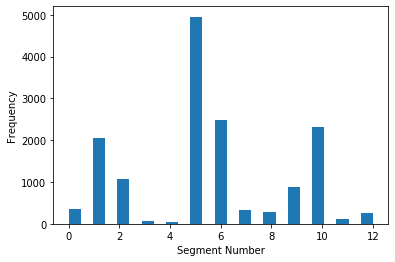

In [11]:
numBins = 25
plt.figure()
df['Segment'].plot.hist(bins=numBins)
plt.xlabel('Segment Number')
plt.show()

Some interesting observations from this segmented distribution of respondents:

- For those in First Year and studying Full-time, about __2/3__ of students live with their families/parents.
- A similar thing can be said for Undergrads not-in-first-year who study Full-time, where about __2/3__ of them live at home.
- For those enrolled Full-time Graduate studies, about __72%__ of them live without their families/parents, which makes sense considering their older age compared to typical undergraduate students.
- Because there are a lot less Part-time students than there are Full-time sutdens, the difference between part-time students that live at home vs those who don't (from each "level" group) do not show a very significanct difference. However, one thing we can observe from this group is that approximately __31%__ of Part-time grad students live at home, which also makes sense due to their age and the high probability that they are working while they study.

# Next Steps

We are planning to run a doubly-constrained gravity model, as was done by Joven using TTS data, on the different segments and combinations thereof. With some luck, we might find that the gravity-based model is acceptable for specific types of students (e.g. those living at/away from home, undergrads/grads) and compare these results to those from TTS. If the gravity model appears more promising after segmenting the population of students, we will attempt to perform a similar segmentation analysis on TTS data and compare our findings with Joven's results.

Furthermore, we can consider a number of other factors that can help predict university choice. From our literature review, we have identified that factors such as income level and university characteristics (tuition, selectivity, etc.) may be correlated with this choice. Incorporating these factors into the analysis may yield more accurate results.